<a href="https://colab.research.google.com/github/Zaineb-bf12/AI_Project_4/blob/master/ExtractioCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/object_detection.zip' object_detection.zip
!cp '/content/drive/My Drive/slim.zip' slim.zip
!unzip object_detection.zip
!unzip slim.zip

Archive:  object_detection.zip
   creating: object_detection/
   creating: object_detection/test_images/
  inflating: object_detection/test_images/image_info.txt  
   creating: __MACOSX/
   creating: __MACOSX/object_detection/
   creating: __MACOSX/object_detection/test_images/
  inflating: __MACOSX/object_detection/test_images/._image_info.txt  
  inflating: object_detection/test_images/image1.jpg  
  inflating: __MACOSX/object_detection/test_images/._image1.jpg  
  inflating: object_detection/test_images/image2.jpg  
  inflating: __MACOSX/object_detection/test_images/._image2.jpg  
  inflating: __MACOSX/object_detection/._test_images  
  inflating: object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz  
   creating: object_detection/metrics/
  inflating: object_detection/metrics/coco_tools.py  
   creating: __MACOSX/object_detection/metrics/
  inflating: __MACOSX/object_detection/metrics/._coco_tools.py  
  inflating: object_detection/metrics/oid_vrd_challenge_evaluation_utils.py 

In [0]:
!python generate_tfrecord.py --csv_input=/content/image/ocr-export.csv --image_dir=/content/image --output_path=train.record
!python generate_tfrecord.py --csv_input=/content/image/ocr-export.csv --image_dir=/content/image --output_path=test.record



W0225 03:52:01.856353 140570579007360 module_wrapper.py:139] From generate_tfrecord.py:104: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0225 03:52:01.879622 140570579007360 module_wrapper.py:139] From generate_tfrecord.py:63: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/train.record


W0225 03:52:05.185580 140654036170624 module_wrapper.py:139] From generate_tfrecord.py:104: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0225 03:52:05.194312 140654036170624 module_wrapper.py:139] From generate_tfrecord.py:63: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/test.record


In [0]:
!cp -r '/content/drive/My Drive/image/vott-csv-export' image

In [0]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz

--2020-02-25 03:52:19--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.139.128, 2607:f8b0:400c:c05::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.139.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

faster_rcnn_resnet5 100%[===================>] 363.69M   185MB/s    in 2.0s    

2020-02-25 03:52:21 (185 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]



In [0]:
!tar -xvf  faster_rcnn_resnet50_coco_2018_01_28.tar.gz

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [0]:
# This is needed since the notebook is stored in the object_detection folder.
import sys
import os
sys.path.append("..")
print(os.listdir("../content"))
from content import object_detection
#print(object_detection)
os.environ['PYTHONPATH'] = ''
os.environ['PYTHONPATH'] += ':../content/:../content/slim/'
print(os.environ['PYTHONPATH'])

['.config', 'generate_tfrecord.py', 'test.record', 'drive', 'object_detection.zip', 'faster_rcnn_resnet50_coco_2018_01_28', 'object_detection', 'train.record', 'export_inference_graph.py', 'slim.zip', 'labelmap.pbtxt', 'image', 'slim', '__MACOSX', 'faster_rcnn_resnet50_coco_2018_01_28.tar.gz', 'sample_data']
:../content/:../content/slim/


In [0]:
!mkdir training

In [0]:
!python /content/object_detection/model_main.py --model_dir=/content/training --pipeline_config_path=faster_rcnn_resnet50_coco_ocr.config

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W0225 03:57:18.641343 139879381190528 module_wrapper.py:139] From /content/object_detection/utils/config_util.py:98: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0225 03:57:18.644480 139879381190528 module_wrapper.py:139] From /content/object_detection/model_lib.py:614: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0225 03:57:18.644654 139879381190528 model_lib.py:615] Forced number of epochs for all eval validations to be 1.

W0225 03:57:18.644800 139879381190528 module_wrapper.py:139] From /content/object_detection/utils/config_util.py:484: 

In [0]:
!zip -r training_ocr.zip training

  adding: training/ (stored 0%)
  adding: training/model.ckpt-1363.meta (deflated 94%)
  adding: training/checkpoint (deflated 74%)
  adding: training/model.ckpt-1363.data-00000-of-00001 (deflated 6%)
  adding: training/model.ckpt-1232.meta (deflated 94%)
  adding: training/model.ckpt-1276.data-00000-of-00001 (deflated 6%)
  adding: training/model.ckpt-1363.index (deflated 73%)
  adding: training/graph.pbtxt (deflated 97%)
  adding: training/eval_0/ (stored 0%)
  adding: training/eval_0/events.out.tfevents.1582603731.640fbe7694fd (deflated 40%)
  adding: training/events.out.tfevents.1582603061.640fbe7694fd (deflated 94%)
  adding: training/model.ckpt-1319.index (deflated 74%)
  adding: training/model.ckpt-1406.meta (deflated 94%)
  adding: training/model.ckpt-1406.index (deflated 74%)
  adding: training/model.ckpt-1276.meta (deflated 94%)
  adding: training/model.ckpt-1276.index (deflated 74%)
  adding: training/model.ckpt-1232.index (deflated 73%)
  adding: training/model.ckpt-1319.da

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
uploaded = drive.CreateFile({'title': 'training_ocr.zip'})
uploaded.SetContentFile('training_ocr.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1mE3_VDx2ASZdJbShnXC6aS39sxd2Rl5_


In [0]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path faster_rcnn_resnet50_coco_ocr.config --trained_checkpoint_prefix training/model.ckpt-1232 --output_directory inference_graph

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W0225 09:35:44.329113 139654851024768 module_wrapper.py:139] From export_inference_graph.py:139: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0225 09:35:44.335538 139654851024768 module_wrapper.py:139] From /content/object_detection/exporter.py:367: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0225 09:35:44.335922 139654851024768 module_wrapper.py:139] From /content/object_detection/exporter.py:110: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0225 09:35:44.381024 139654851024768 module_wrapper.py:139] From /

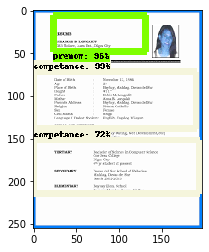

In [0]:
######## Image Object Detection Using Tensorflow-trained Classifier #########
#
# Author: Evan Juras
# Date: 1/15/18
# Description: 
# This program uses a TensorFlow-trained classifier to perform object detection.
# It loads the classifier uses it to perform object detection on an image.
# It draws boxes and scores around the objects of interest in the image.

## Some of the code is copied from Google's example at
## https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

## and some is copied from Dat Tran's example at
## https://github.com/datitran/object_detector_app/blob/master/object_detection_app.py

## but I changed it to make it more understandable to me.

# Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
import cv2
from matplotlib import pyplot as plt

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'cv104.png'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 7

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_expanded = np.expand_dims(image, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)


#Show the image with matplotlib
plt.imshow(image)
plt.show()




# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()
